# Error Analysis of Derivatives
We wish to take the derivative $$ y = cos(x) $$ with the analytical derivative of $$ y' = -sin(x)$$
using the forward difference and central differnce schemes. We define them below:

In [2]:
import numpy as np

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx

### 1) Evaluate the derivative at position $x=  \frac{\pi}{4}$using the forward difference scheme.
Forward difference Scheme:

\begin{equation}
\frac{d y(t)}{dt}_{fw} = y'(t)+\frac{dx}{2!}*y''(t)+\frac{dx^2}{3!}*y'''(t)+...
\end{equation}
Error is $\frac{dx}{2!}*y''(t)+\frac{dx^2}{3!}*y'''(t)+...$

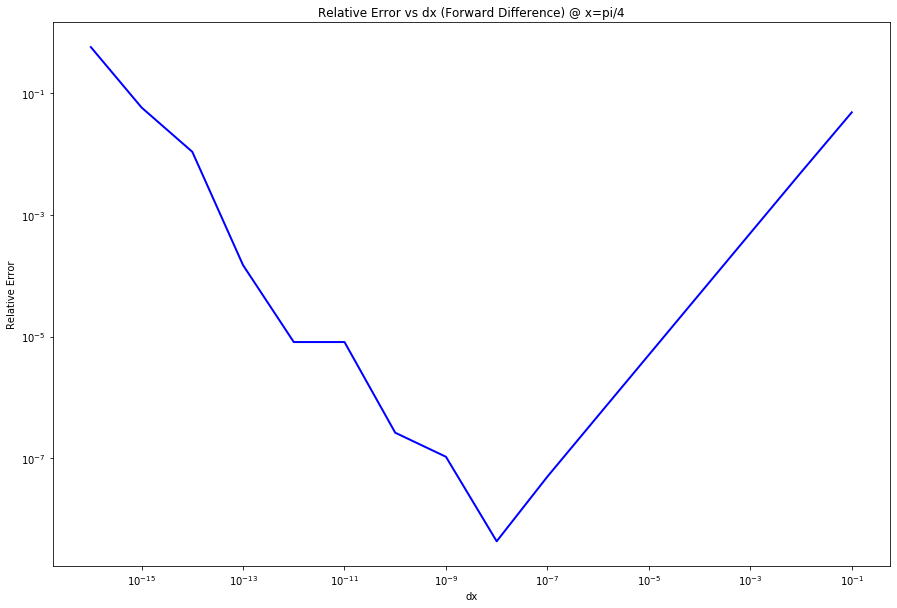

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt


x=(np.pi)/4         #We evaluate at this pi/4
dxarr=[]
yarr=[]
for i in range(1,17):
    dx = 10**(-i)
    y=derifw(np.cos,x,dx)
    dxarr.append(dx)
    yarr.append(y)
plt.figure(figsize=(15,10)) 
plt.title("Relative Error vs dx (Forward Difference) @ x=pi/4")
plt.plot(dxarr, abs((yarr+np.sin(np.pi/4))/np.sin(np.pi/4)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Relative Error')
plt.show()

As we can see the lowest relative error occurs when: $$ dx \approx 10^{-8}$$

The reason for this seems to be as dx gets smaller and smaller, the error terms for the forward difference scheme get smaller as well but this has a limit. Because the second derivative and higher order derivatives of $y=cos(x)$, the sign flips and the error become subject to the **subraction cancellation** error.

### 2) Evaluate the derivative at position $x=  \frac{\pi}{4}$using the central difference scheme.
Central difference scheme:
\begin{equation}
\frac{d y(t)}{dt}_{cd} = y'(t) + \frac{dx^2}{4*3!}*y'''(t)+\frac{dx^4}{2^4*5!}*y^{5}(t)....
\end{equation}
Error is $\frac{dx^2}{4*3!}*y'''(t)+\frac{dx^4}{2^4*5!}*y^{5}(t)....$. 

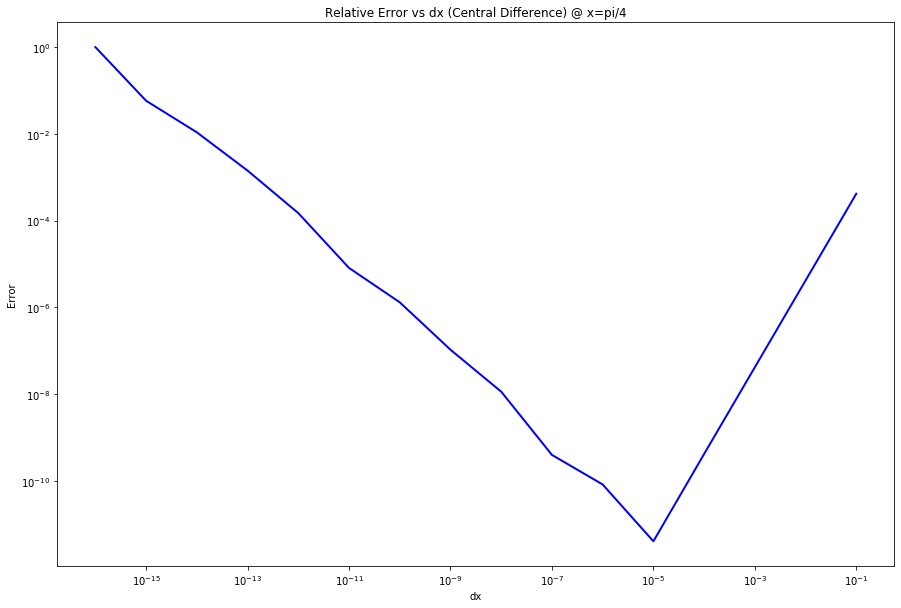

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt


x=(np.pi)/4
dxarr=[]
yarr=[]
for i in range(1,17):
    dx = 10**(-i)
    y=dericd(np.cos,x,dx)
    dxarr.append(dx)
    yarr.append(y)
plt.figure(figsize=(15,10)) 
plt.title("Relative Error vs dx (Central Difference) @ x=pi/4")
plt.plot(dxarr, abs((yarr+np.sin(np.pi/4))/np.sin(np.pi/4)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()


As we can see the lowest relative error occurs when: $$ dx \approx 10^{-5}$$

The reason for this seems to be as dx gets smaller and smaller, the error terms for the forward difference scheme get smaller as well but this has a limit. Because the second derivative and higher order derivatives of $y=cos(x)$, the sign flips and the error become subject to the **subraction cancellation** error. This scheme does appears to better than the forward scheme due to its higher order powers for the dx causing the the error to become smaller and smaller faster as dx becomes smaller

### 3) Evaluate the derivative at position $x= 0$ using the central difference scheme.

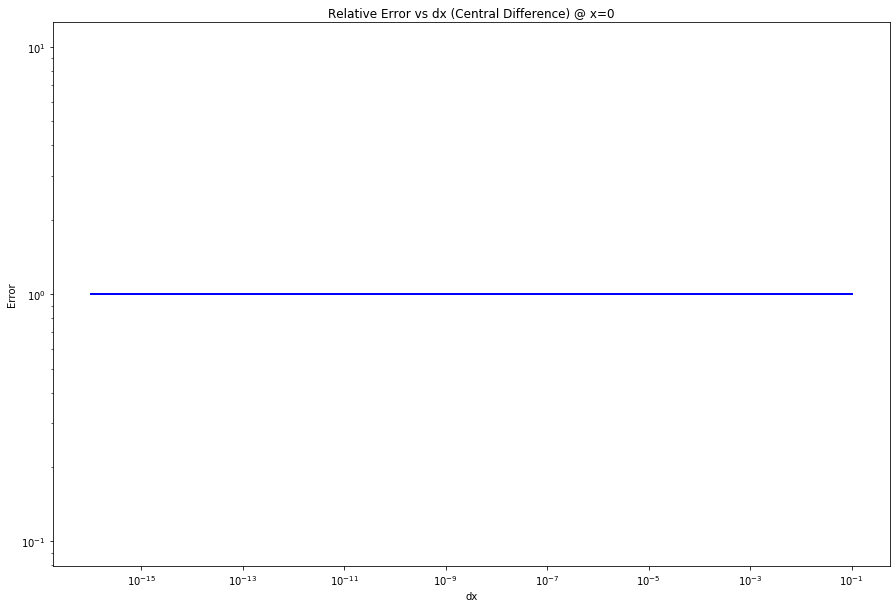

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt


x=0
dxarr=[]
yarr=[]
for i in range(1,17):
    dx = 10**(-i)
    y=dericd(np.cos,x,dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.figure(figsize=(15,10)) 
plt.title("Relative Error vs dx (Central Difference) @ x=0")
plt.plot(dxarr, abs((yarr+np.sin(np.pi/4))/np.sin(np.pi/4)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()



The error seems to be zero for any given dx evaluated at x=0. Looking at the error term of the central difference scheme, $\frac{dx^2}{4*3!}*y'''(t)+\frac{dx^4}{2^4*5!}*y^{5}(t)....$, we can see that every term has an odd order derivative and the odd derivative of y=cos(x) is always a form of sin(x):
$$ y'=-sin(x) $$
$$ y'''=sin(x) $$
$$ y^{5}=-sin(x) $$ 

therefore, evaluted at $x=0, sin(0)$ is always zero
based on this, every error term in the derivative of $cos(x)$ is zero due to all the $sin(0)$ terms being zero and the total error resulting in 0 
$$\frac{d y(t)}{dt}_{cd} = y'(t) + \frac{dx^2}{4*3!}*0+\frac{dx^4}{2^4*5!}*0....$$
$$\frac{d y(t)}{dt}_{cd} = y'(t) $$
$$ Error = 0$$